https://www.epj-conferences.org/articles/epjconf/pdf/2023/09/epjconf_uhecr2023_04009.pdf

## Bellhop - Acoustic Toolbox

# Sound Speed Profile of ARCA site

In [60]:
import arlpy.uwapm as pm
import arlpy.plot as plt
import numpy as np

env = pm.create_env2d()


# make the speed of sound profile for the ORCA site (ANTARES data used): ARCA_Dive_10May2016.cnv
ssp = [
    [   0, 1520.63],
    [   5, 1521.23], 
    [   8, 1521.37], 
    [  13, 1520.53], 
    [  18, 1520.43], 
    [  28, 1520.30], 
    [  38, 1518.48], 
    [  48, 1516.30], 
    [  58, 1514.76], 
    [  68, 1514.07], 
    [  78, 1513.20], 
    [  88, 1513.30], 
    [  98, 1513.33],
    [ 108, 1513.52], 
    [ 158, 1514.45], 
    [ 208, 1514.76], 
    [ 308, 1515.46], 
    [ 408, 1516.13], 
    [ 508, 1517.18], 
    [ 608, 1518.16], 
    [ 708, 1519.48], 
    [ 808, 1520.88], 
    [ 908, 1522.33], 
    [1008, 1523.87], 
    [1108, 1525.47], 
    [1208, 1527.10], 
    [1308, 1528.74], 
    [1408, 1530.38], 
    [1508, 1532.06], 
    [1608, 1533.73], 
    [1708, 1535.40], 
    [1808, 1537.11], 
    [1908, 1538.79], 
    [2008, 1540.46], 
    [2108, 1542.16], 
    [2208, 1543.84], 
    [2308, 1545.52], 
    [2408, 1547.18],
    [2508, 1548.89], 
    [2608, 1550.60], 
    [2708, 1552.30], 
    [2808, 1554.01], 
    [2908, 1555.73], 
    [3008, 1557.44], 
    [3108, 1559.18], 
    [3208, 1560.92], 
    [3308, 1562.61], 
    [3408, 1564.34], 
    [3508, 1566.09]]

# frequency min and max: https://www.sciencedirect.com/science/article/pii/S0168900212015239
frequency_min = 25000      # 25 kHz
frequency_max = 45000      # 45 kHz

In [89]:
transmitter_depth = 3508
receiver_depth = 3408
hi = 5
dis = 1000
bathy = [
    [0, transmitter_depth],             # 3508 m water depth at the transmitter
    [0.5*dis-1, (0.5 * (transmitter_depth + receiver_depth))],
    [0.5*dis, (0.5 * (transmitter_depth + receiver_depth) - hi)],
    [0.5*dis+1, (0.5 * (transmitter_depth + receiver_depth))],
    [dis, receiver_depth],              # (3508 - elevation) m water depth (distance) m away
    [dis+100, receiver_depth]]          # (3508 - elevation) m water depth (distance + 100) m away

# Create the 2D environment with both the source and the receiver placed 3 m above the sea floor
env = pm.create_env2d(frequency=frequency_min, min_angle=-89, max_angle=89, depth=bathy, tx_depth=3505, rx_depth=3405, rx_range=1000, soundspeed=ssp, nbeams=100)

# Plot the sound speed profile
pm.plot_ssp(env, width=500)

In [90]:
pm.plot_env(env, width=1000)

In [81]:
rays = pm.compute_rays(env)
rays = pm.plot_rays(rays, env=env, width=900)

# Scan of distances and elevations

In [114]:
# define the range of distance and elevation you want to research
distance = np.linspace(50, 2000, 40)
elevation = np.linspace(0, 30, 31)
hill_height = np.linspace(0, 2, 21)

#distance = np.linspace(50, 2000, 3)
#elevation = np.linspace(0, 30, 2)

print(distance)
print(elevation)
print(hill_height)

[  50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.  600.
  650.  700.  750.  800.  850.  900.  950. 1000. 1050. 1100. 1150. 1200.
 1250. 1300. 1350. 1400. 1450. 1500. 1550. 1600. 1650. 1700. 1750. 1800.
 1850. 1900. 1950. 2000.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]


In [109]:
# initialise empty arrays that will be filled with the number of rays that directly reach the receiver for min and max frequencies
num_zero_bounces_min = np.zeros((len(distance), len(elevation)), dtype=int)
num_zero_bounces_max = np.zeros((len(distance), len(elevation)), dtype=int)

print(num_zero_bounces_min.shape)

# loop through the distances and elevations to check for each scenario individually
for i in range(0, len(distance)):
    for j in range(0, len(elevation)):
        dis = distance[i]
        el = elevation[j]
        #print(f"dis: {dis}")
        #print(f"el: {el}")
        
        # define the depth of the ocean at the location of your transmitter
        transmitter_depth = 3508
        receiver_depth = (transmitter_depth - el)
        tx_depth = transmitter_depth - 3
        rx_depth = receiver_depth - 3
        #print(f"receiver_depth: {receiver_depth}")
        #print(f"tx_depth: {tx_depth}")
        #print(f"rx_depth: {rx_depth}")
        
        
        # make the bathymetry for the environment with above parameters
        bathy = [
            [0, transmitter_depth],             # 3508 m water depth at the transmitter
            [dis, receiver_depth],              # (3508 - elevation) m water depth (distance) m away
            [dis+100, receiver_depth]]          # (3508 - elevation) m water depth (distance + 100) m away

        # create two environments with different frequencies
        env_min = pm.create_env2d(frequency=frequency_min, min_angle=-89, max_angle=89, depth=bathy, tx_depth=tx_depth, rx_depth=rx_depth, rx_range=dis, soundspeed=ssp, nbeams=10000)
        env_max = pm.create_env2d(frequency=frequency_max, min_angle=-89, max_angle=89, depth=bathy, tx_depth=tx_depth, rx_depth=rx_depth, rx_range=dis, soundspeed=ssp, nbeams=10000)

        #pm.plot_env(env_min, surface_color='dodgerblue', bottom_color='peru', rx_color='blue', rx_plot=None, width=900)
        
        try:
            # compute the arrivals
            arrivals_min = pm.compute_arrivals(env_min)
            arrivals_max = pm.compute_arrivals(env_max)

            # check which arrivals have 0 bounces against the surface or the bottom
            zero_bounces_min = arrivals_min[(arrivals_min['surface_bounces'] == 0) & (arrivals_min['bottom_bounces'] == 0)]
            zero_bounces_max = arrivals_max[(arrivals_max['surface_bounces'] == 0) & (arrivals_max['bottom_bounces'] == 0)]

            # count how many rays arrive with no bounces
            num_zero_bounces_min_val = len(zero_bounces_min)
            num_zero_bounces_max_val = len(zero_bounces_max)
        
        except Exception as e:
            print("hoi")


        # save the counts to the initialised array
        num_zero_bounces_min[i, j] = num_zero_bounces_min_val
        num_zero_bounces_max[i, j] = num_zero_bounces_max_val

# Print the arrays
print("Array of counts of zero-bounce arrivals for min frequencies:")
print(num_zero_bounces_min)
print("\nArray of counts of zero-bounce arrivals for max frequencies:")
print(num_zero_bounces_max)

(40, 31)


KeyboardInterrupt: 

In [115]:
# initialise empty arrays that will be filled with the number of rays that directly reach the receiver for min and max frequencies
num_zero_bounces_min = np.zeros((len(distance), len(elevation)), dtype=int)
num_zero_bounces_max = np.zeros((len(distance), len(elevation)), dtype=int)

print(num_zero_bounces_min.shape)

# loop through the distances and elevations to check for each scenario individually
for i in range(0, len(hill_height)):
    for j in range(0, len(elevation)):
        dis = 1000
        hi = hill_height[i]
        el = elevation[j]
        #print(f"dis: {dis}")
        #print(f"el: {el}")
        
        # define the depth of the ocean at the location of your transmitter
        transmitter_depth = 3508
        receiver_depth = (transmitter_depth - el)
        tx_depth = transmitter_depth - 3
        rx_depth = receiver_depth - 3
        #print(f"receiver_depth: {receiver_depth}")
        #print(f"tx_depth: {tx_depth}")
        #print(f"rx_depth: {rx_depth}")
        
        
        # make the bathymetry for the environment with above parameters
        bathy = [
            [0, transmitter_depth],             # 3508 m water depth at the transmitter
            [0.5*dis-1, (0.5 * (transmitter_depth + receiver_depth))],
            [0.5*dis, (0.5 * (transmitter_depth + receiver_depth) - hi)],
            [0.5*dis+1, (0.5 * (transmitter_depth + receiver_depth))],
            [dis, receiver_depth],              # (3508 - elevation) m water depth (distance) m away
            [dis+100, receiver_depth]]          # (3508 - elevation) m water depth (distance + 100) m away

        # create two environments with different frequencies
        env_min = pm.create_env2d(frequency=frequency_min, min_angle=-89, max_angle=89, depth=bathy, tx_depth=tx_depth, rx_depth=rx_depth, rx_range=dis, soundspeed=ssp, nbeams=10000)
        env_max = pm.create_env2d(frequency=frequency_max, min_angle=-89, max_angle=89, depth=bathy, tx_depth=tx_depth, rx_depth=rx_depth, rx_range=dis, soundspeed=ssp, nbeams=10000)

        #pm.plot_env(env_min, surface_color='dodgerblue', bottom_color='peru', rx_color='blue', rx_plot=None, width=900)
        
        try:
            # compute the arrivals
            arrivals_min = pm.compute_arrivals(env_min)
            arrivals_max = pm.compute_arrivals(env_max)

            # check which arrivals have 0 bounces against the surface or the bottom
            zero_bounces_min = arrivals_min[(arrivals_min['surface_bounces'] == 0) & (arrivals_min['bottom_bounces'] == 0)]
            zero_bounces_max = arrivals_max[(arrivals_max['surface_bounces'] == 0) & (arrivals_max['bottom_bounces'] == 0)]

            # count how many rays arrive with no bounces
            num_zero_bounces_min_val = len(zero_bounces_min)
            num_zero_bounces_max_val = len(zero_bounces_max)
        
        except Exception as e:
            print("hoi")


        # save the counts to the initialised array
        num_zero_bounces_min[i, j] = num_zero_bounces_min_val
        num_zero_bounces_max[i, j] = num_zero_bounces_max_val

# Print the arrays
print("Array of counts of zero-bounce arrivals for min frequencies:")
print(num_zero_bounces_min)
print("\nArray of counts of zero-bounce arrivals for max frequencies:")
print(num_zero_bounces_max)

(40, 31)
Array of counts of zero-bounce arrivals for min frequencies:
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Array of counts of zero-bounce arrivals for max frequencies:
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


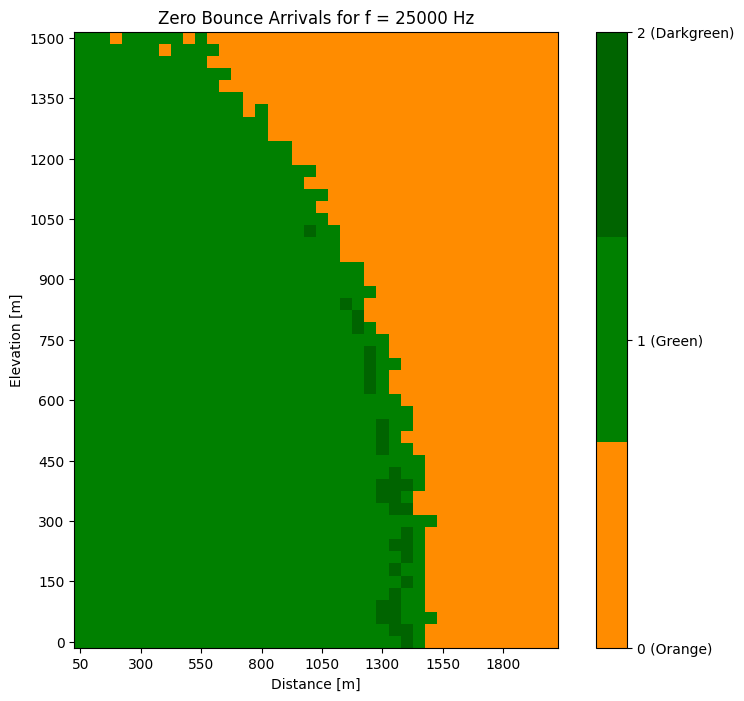

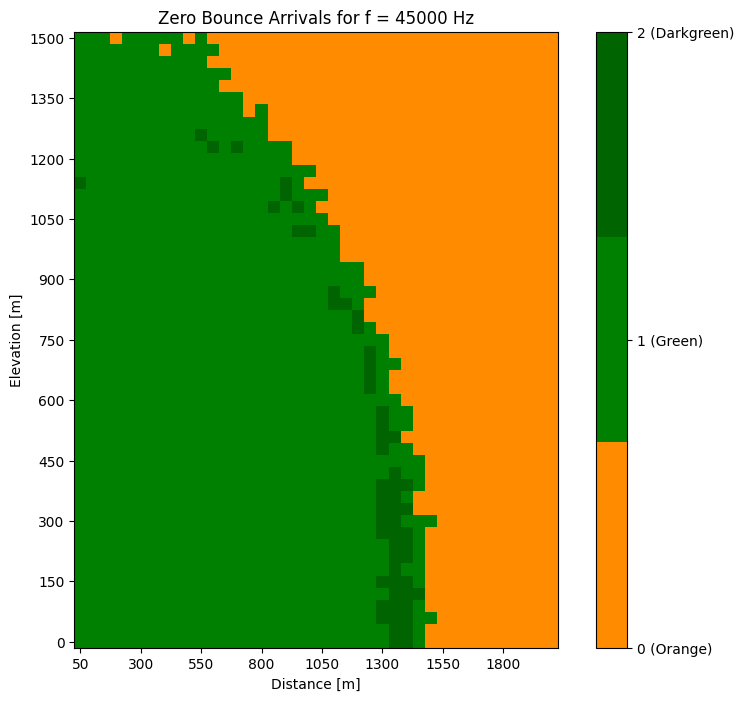

In [56]:
import matplotlib.pyplot as plt

# define custom colors for each value
colors = ['darkorange', 'green', 'darkgreen']

# create a colormap from the custom colors
cmap = plt.matplotlib.colors.ListedColormap(colors)

# create a plot minimum frequency
plt.figure(figsize=(10, 8))
plt.imshow(num_zero_bounces_min.T, cmap=cmap, interpolation='nearest')

# add color bar
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.set_ticklabels(['0 (Orange)', '1 (Green)', '2 (Darkgreen)'])

# set axis labels and ticks
plt.xlabel('Distance [m]')
plt.ylabel('Elevation [m]')

plt.xticks(np.arange(0, num_zero_bounces_min.shape[0], 5), distance.astype(int)[::5])
plt.yticks(np.arange(0, num_zero_bounces_min.shape[1], 5), elevation.astype(int)[::5])

# invert the y axis
plt.gca().invert_yaxis()

# show plot
plt.title(f'Zero Bounce Arrivals for f = {frequency_min} Hz')
plt.grid(False)

# save the plot as an image file
plt.savefig('ARCA_25000Hz_extreme_elevation.png')

plt.show()

####################################################################################################################################

# create a plot maximum frequency
plt.figure(figsize=(10, 8))
plt.imshow(num_zero_bounces_max.T, cmap=cmap, interpolation='nearest')

# add color bar
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.set_ticklabels(['0 (Orange)', '1 (Green)', '2 (Darkgreen)'])

# set axis labels and ticks
plt.xlabel('Distance [m]')
plt.ylabel('Elevation [m]')

plt.xticks(np.arange(0, num_zero_bounces_min.shape[0], 5), distance.astype(int)[::5])
plt.yticks(np.arange(0, num_zero_bounces_min.shape[1], 5), elevation.astype(int)[::5])

# invert the y axis
plt.gca().invert_yaxis()

# show plot
plt.title(f'Zero Bounce Arrivals for f = {frequency_max} Hz')
plt.grid(False)

# save the plot as an image file
plt.savefig('ARCA_45000Hz_extreme_elevation.png')

plt.show()

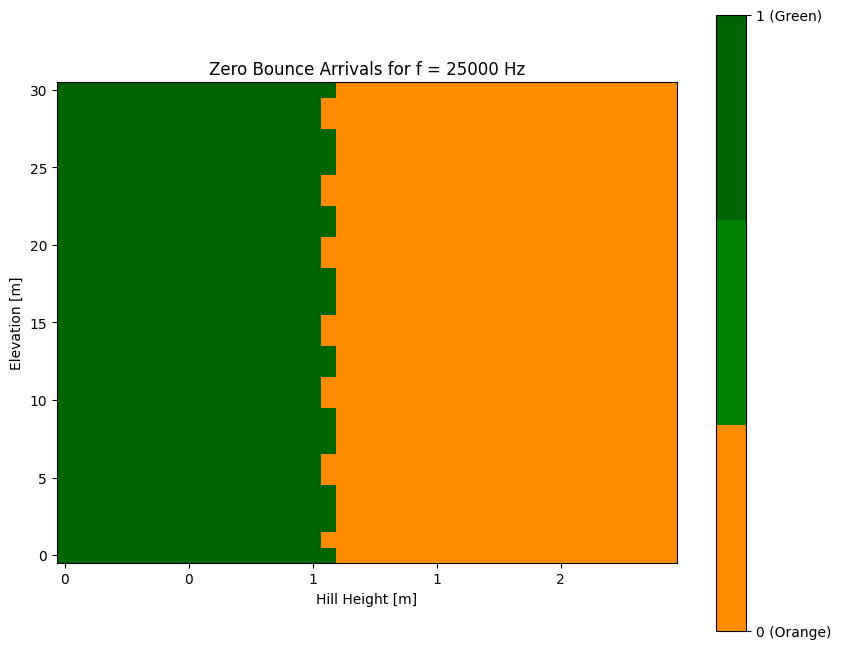

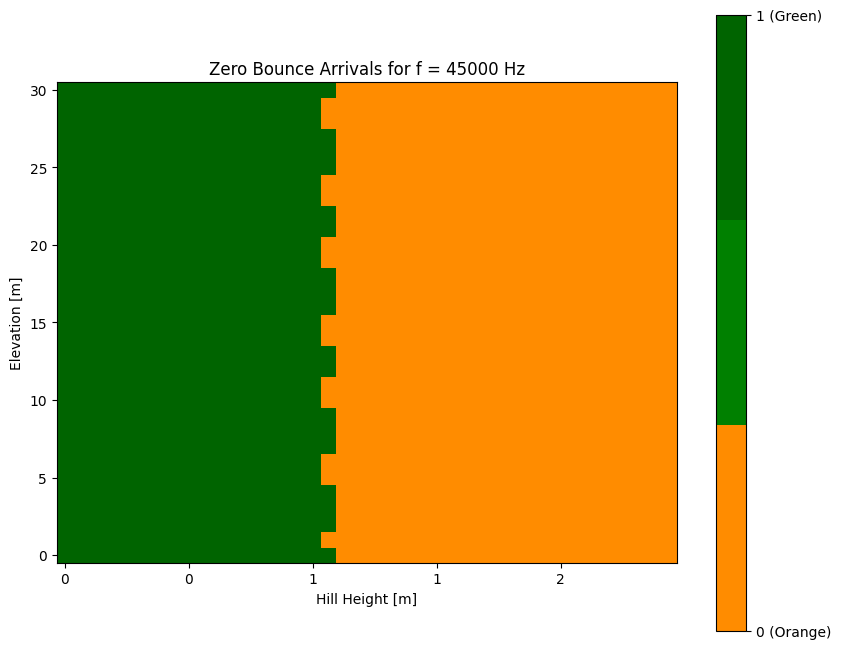

In [116]:
import matplotlib.pyplot as plt

# define custom colors for each value
colors = ['darkorange', 'green', 'darkgreen']

# create a colormap from the custom colors
cmap = plt.matplotlib.colors.ListedColormap(colors)

# create a plot minimum frequency
plt.figure(figsize=(10, 8))
plt.imshow(num_zero_bounces_min.T, cmap=cmap, interpolation='nearest')

# add color bar
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.set_ticklabels(['0 (Orange)', '1 (Green)', '2 (Darkgreen)'])

# set axis labels and ticks
plt.xlabel('Hill Height [m]')
plt.ylabel('Elevation [m]')

plt.xticks(np.arange(0, num_zero_bounces_min.shape[0], 8), hill_height.astype(int)[::5])
plt.yticks(np.arange(0, num_zero_bounces_min.shape[1], 5), elevation.astype(int)[::5])

# invert the y axis
plt.gca().invert_yaxis()

# show plot
plt.title(f'Zero Bounce Arrivals for f = {frequency_min} Hz')
plt.grid(False)

# save the plot as an image file
plt.savefig('ARCA_25000Hz_Hill_Height.png')

plt.show()

####################################################################################################################################

# create a plot maximum frequency
plt.figure(figsize=(10, 8))
plt.imshow(num_zero_bounces_max.T, cmap=cmap, interpolation='nearest')

# add color bar
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.set_ticklabels(['0 (Orange)', '1 (Green)', '2 (Darkgreen)'])

# set axis labels and ticks
plt.xlabel('Hill Height [m]')
plt.ylabel('Elevation [m]')

plt.xticks(np.arange(0, num_zero_bounces_max.shape[0], 8), hill_height.astype(int)[::5])
plt.yticks(np.arange(0, num_zero_bounces_max.shape[1], 5), elevation.astype(int)[::5])

# invert the y axis
plt.gca().invert_yaxis()

# show plot
plt.title(f'Zero Bounce Arrivals for f = {frequency_max} Hz')
plt.grid(False)

# save the plot as an image file
plt.savefig('ARCA_45000Hz_Hill_Height.png')

plt.show()